In [19]:
### import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from utils import seir, seir_ivp, modified_seir, run_modified_seir_ivp, plot_timeseries, run_modified_seir

# Time-Series Plots

Here we generate time-series plots using a specific $R_{0,V}$ value and vaccine efficacy, to model and compare the population dynamics of the two modes of vaccine failure - Leaky and All-or-Nothing. The following 9 regimes governed by the timing and maximum coverage of vaccination were investigated:
- Pre-transmission Vaccination, Coverage Below $f^*_V$ 
- Pre-transmission Vaccination, Coverage Slightly Above $f^*_V$
- Pre-transmission Vaccination, Coverage Above $f^*_V$
- 10 Days Post-transmission Vaccination, Coverage Below $f^*_V$
- 10 Days Post-transmission Vaccination, Coverage Slightly Above $f^*_V$
- 10 Days Post-transmission Vaccination, Coverage Above $f^*_V$
- 30 Days Post-transmission Vaccination, Coverage Below $f^*_V$
- 30 Days Post-transmission Vaccination, Coverage Slightly Above $f^*_V$
- 30 Days Post-transmission Vaccination, Coverage Above $f^*_V$

Recall that $f^*_V$ represents the critical vaccination threshold and is defined as: 

$$ f^*_V = \frac{1}{\epsilon_L \epsilon_A} (1 - \frac{1}{R_0}) $$

for instantaneous vaccination before the epidemic starts, and 

$$ f^*_V = \frac{1}{\epsilon_L \epsilon_A} (1 - \frac{1}{R_0(1 - f_R)})$$

for instantaneous vaccination after the epidemic starts. 

Based on the contour plot and surface plot, let $R_{0,V} = 2.5$ and $\epsilon_L = 0.6$ (Leaky) or $\epsilon_A = 0.6$ (All-or-Nothing). The simulation was run for 200 days with the following parameter values and initial conditions: $\beta = 2.5/4$, $\gamma = 1/4$, $\sigma=1/4$, $S(0) = 0.98$ $E(0) = 0.01$, $I(0) = 0.01$, $R(0) = 0$.

## Pre-transmission Vaccination

In [39]:
# common parameter values
sigma = 1/4; gamma = 1/4; beta = 2.5 * gamma; eps = 0.6; fc = 1/eps * (1 - 1/2.5)
t = 200; tv = -1

# set initial conditions
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0
y0 = [s0, e0, i0, r0]

# no vaccination
sim = odeint(seir, y0, np.linspace(0, t, t+1), args=(beta, sigma, gamma))
sim = sim.T

### Coverage Below $f^*_V$

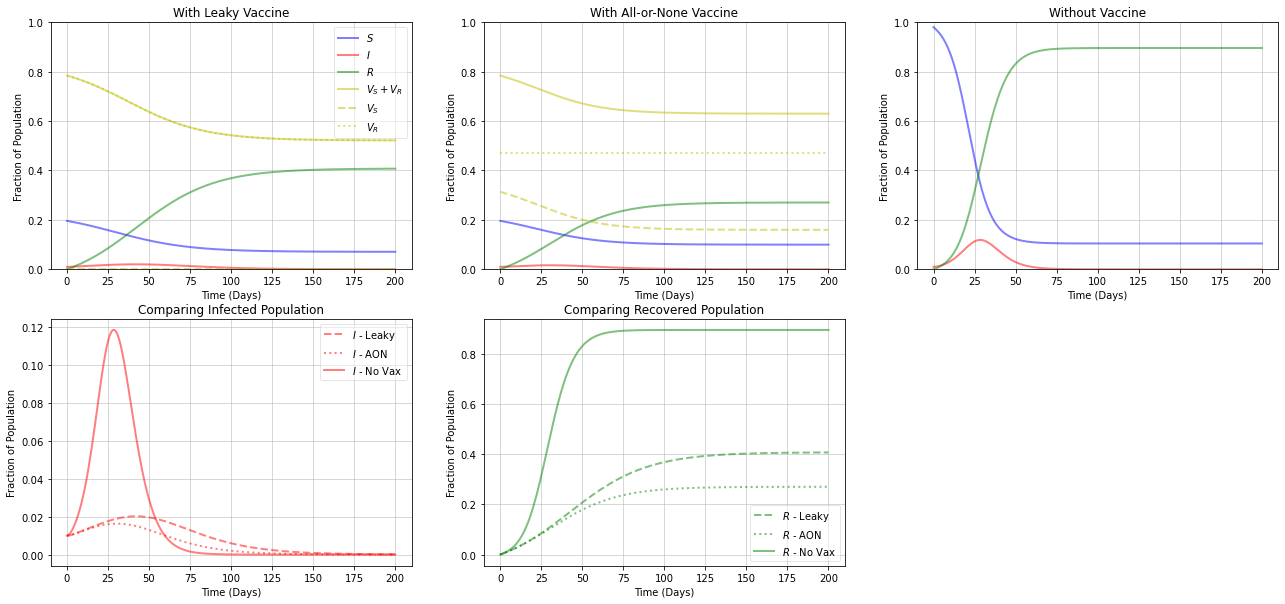

In [42]:
### run model
# set parameters
t = 200; fv = fc * 0.8

# leaky
sim_leaky_0_below = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_0_below = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_0_below, sim_aon_0_below, savefig=False, filename='timeseries_pre_below')

### Coverage Slightly Above $f^*_V$

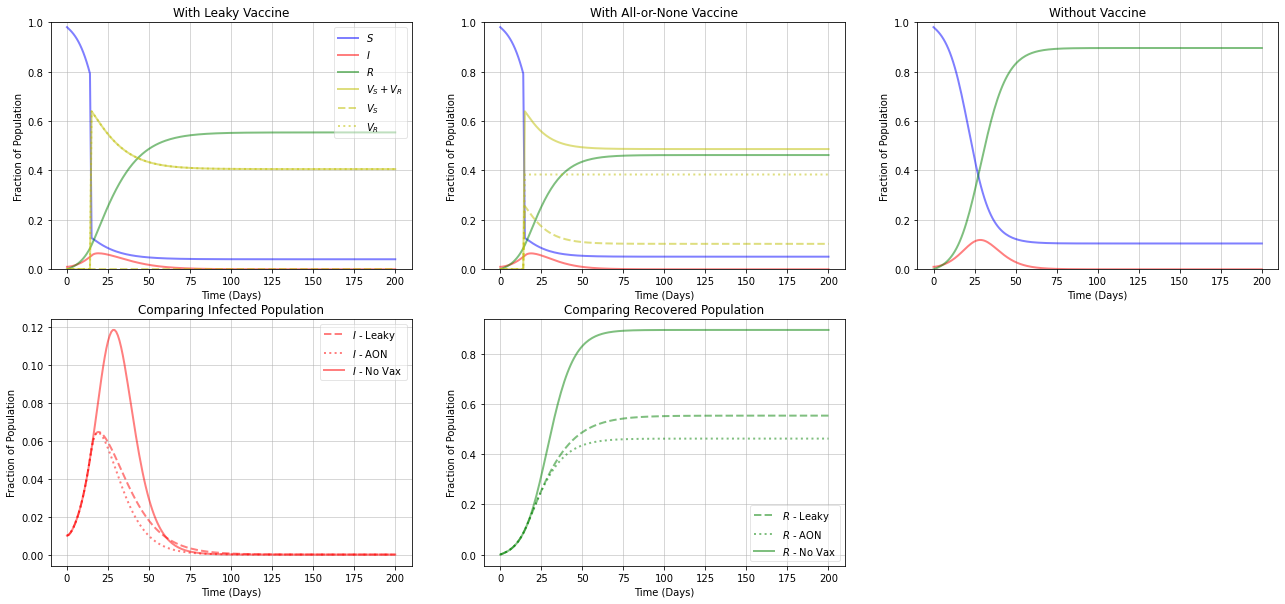

In [48]:
### run model
# set parameters
t = 200; fv = 1 - ((1 - fc) * 0.8)

# leaky
sim_leaky_0_slabove = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_0_slabove = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_0_slabove, sim_aon_0_slabove, savefig=False, filename='timeseries_pre_slabove')

### Coverage Above $f^*_V$

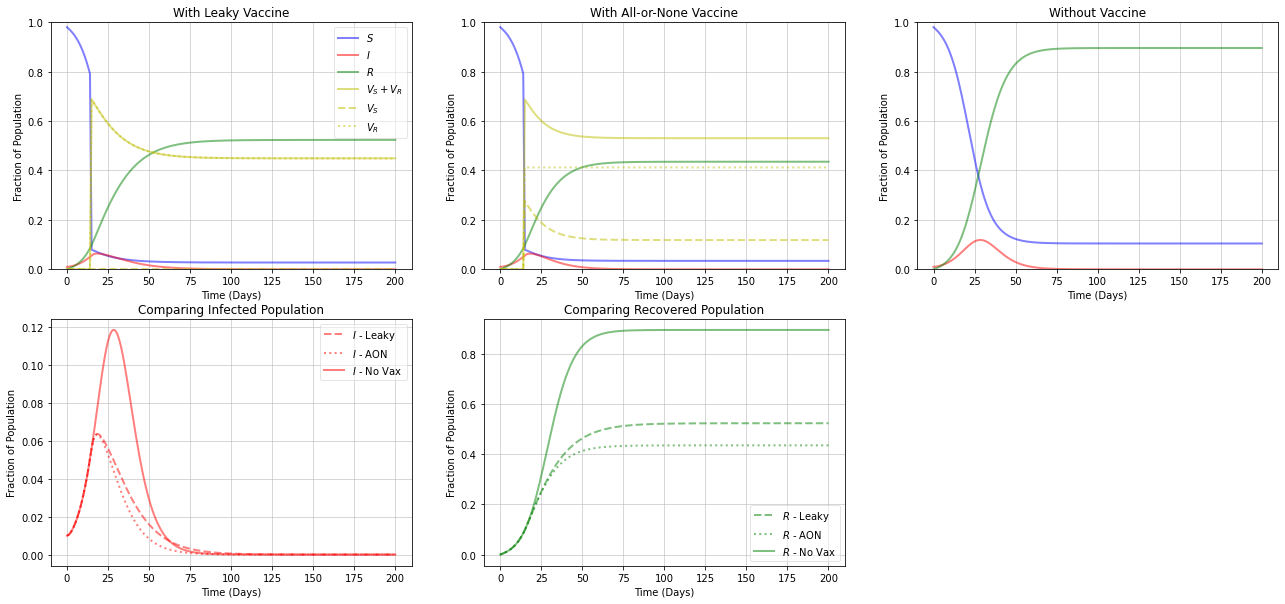

In [49]:
### run model
# set parameters
t = 200; fv = 1 - ((1 - fc) * 0.5)

# leaky
sim_leaky_0_above = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_0_above = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_0_above, sim_aon_0_above, savefig=False, filename='timeseries_pre_above')

## Vaccination at 10% Epidemic Size

In [50]:
# common parameter values
sigma = 1/4; gamma = 1/4; beta = 2.5 * gamma; eps = 0.6
t = 200

# set initial conditions
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0
y0 = [s0, e0, i0, r0]

# no vaccination
sim = odeint(seir, y0, np.linspace(0, t, t+1), args=(beta, sigma, gamma))
sim = sim.T

# set fc
def _reach_size10(t, y, beta, sigma, gamma): return y[3] - 0.1
_reach_size10.terminate=True

sol = solve_ivp(seir_ivp, [0, t], y0, args=(beta, sigma, gamma), events=_reach_size10, dense_output=True)
s_temp = np.ravel(np.array(sol.y_events[0]))[0]
tv = int(np.round(np.ravel(np.array(sol.t_events))[0]))
fc = 1/eps * (1 - 1/(2.5*s_temp))

### Coverage Below $f^*_V$

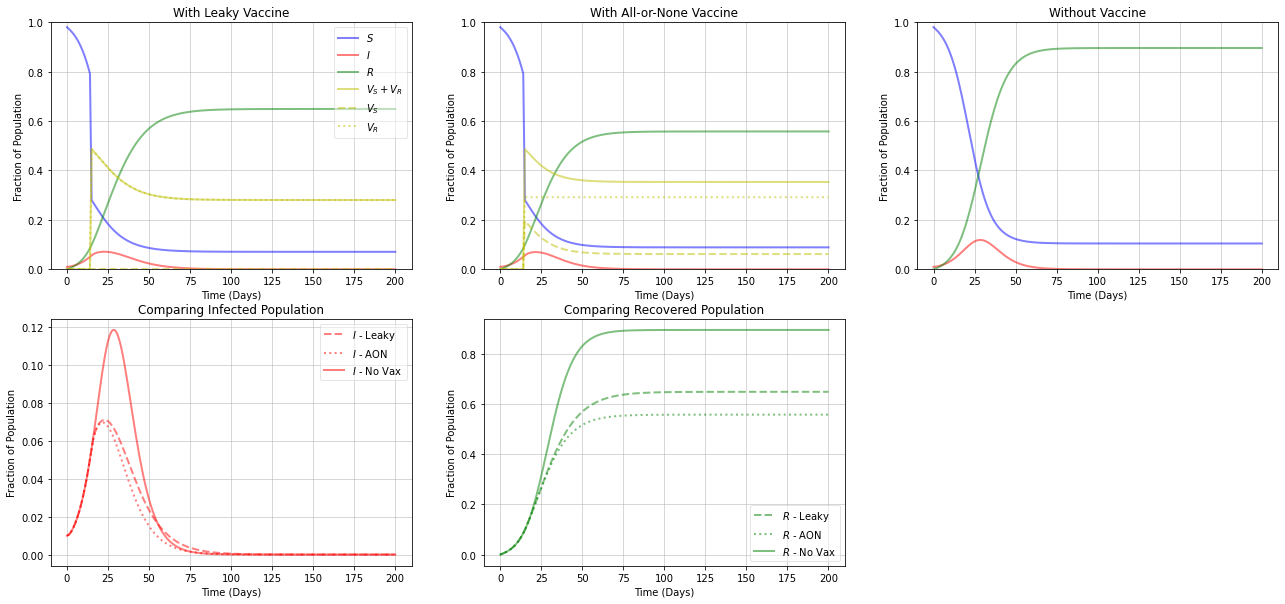

In [51]:
### run model
# set parameters
fv = fc * 0.8

# leaky
sim_leaky_10_below = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_10_below = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_10_below, sim_aon_10_below, savefig=False, filename='timeseries_post10_below')

### Slightly Above $f^*_V$

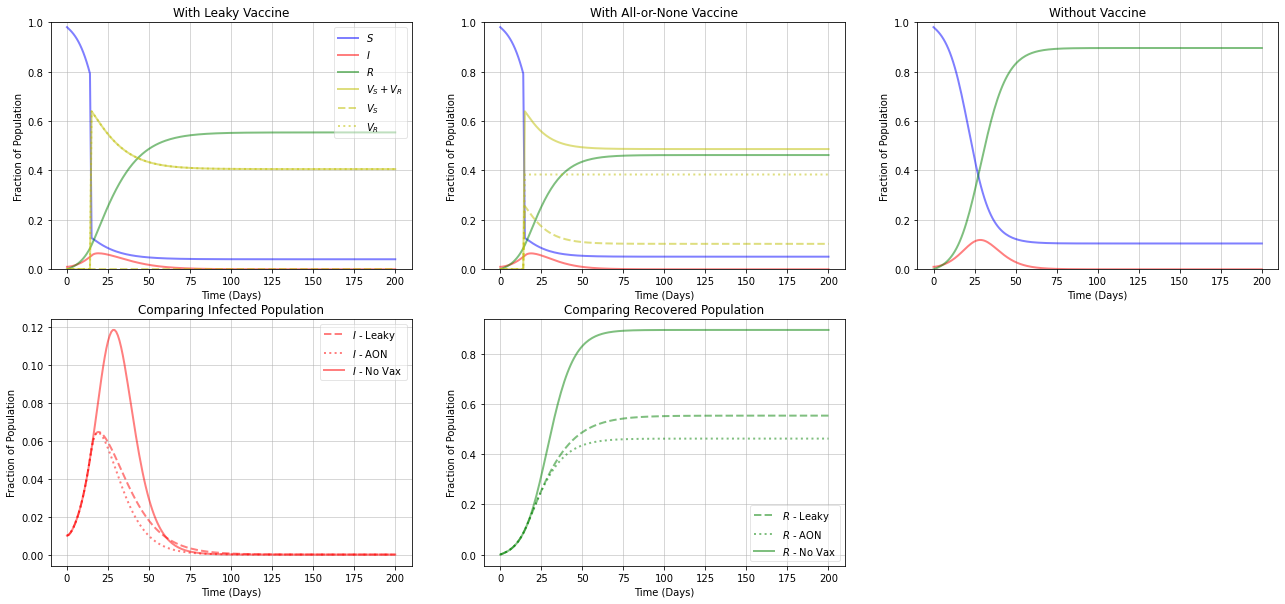

In [31]:
### run model
# set parameters
fv = 1 - ((1 - fc) * 0.8)

# leaky
sim_leaky_10_slabove = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_10_slabove = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_10_slabove, sim_aon_10_slabove, savefig=False, filename='timeseries_post10_below')

### Above $f^*_V$

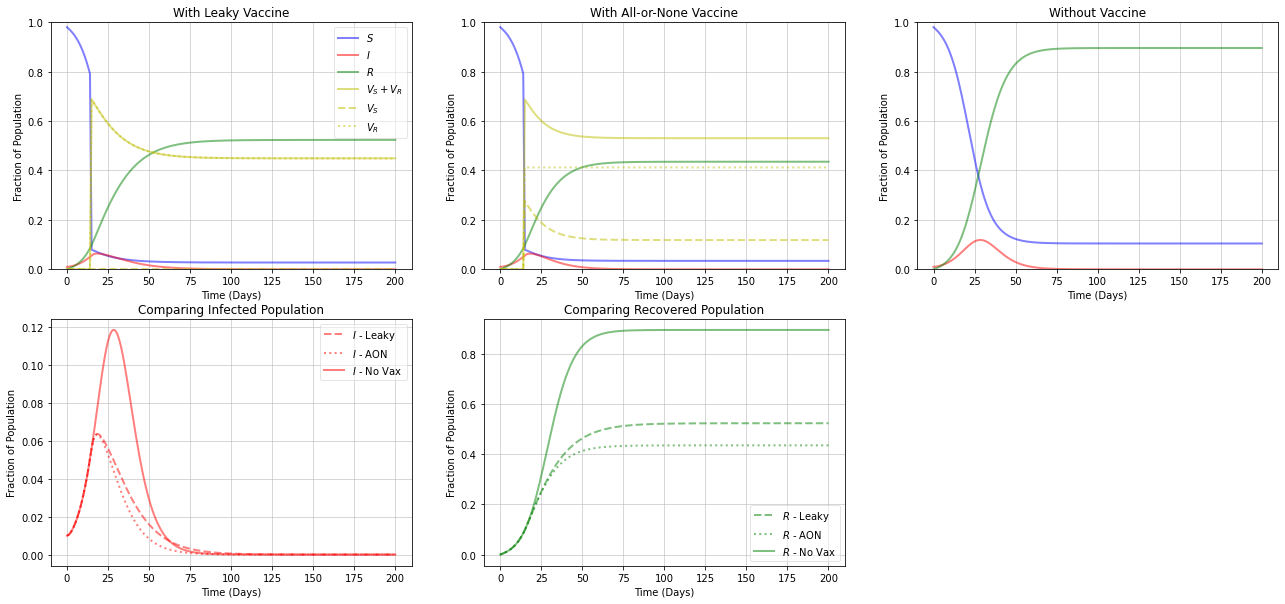

In [52]:
### run model
# set parameters
fv = 1 - ((1 - fc) * 0.5)

# leaky
sim_leaky_10_above = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_10_above = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_10_above, sim_aon_10_above, savefig=False, filename='timeseries_post10_below')

## Vaccination at 25% Epidemic Size

In [55]:
# common parameter values
sigma = 1/4; gamma = 1/4; beta = 2.5 * gamma; eps = 0.6
t = 200

# set initial conditions
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0
y0 = [s0, e0, i0, r0]

# no vaccination
sim = odeint(seir, y0, np.linspace(0, t, t+1), args=(beta, sigma, gamma))
sim = sim.T

# set fc
def _reach_size25(t, y, beta, sigma, gamma): return y[3] - 0.1
_reach_size25.terminate=True

sol = solve_ivp(seir_ivp, [0, t], y0, args=(beta, sigma, gamma), events=_reach_size25, dense_output=True)
s_temp = np.ravel(np.array(sol.y_events[0]))[0]
tv = int(np.round(np.ravel(np.array(sol.t_events))[0]))
fc = 1/eps * (1 - 1/(2.5*s_temp))

### Coverage Below $f^*_V$

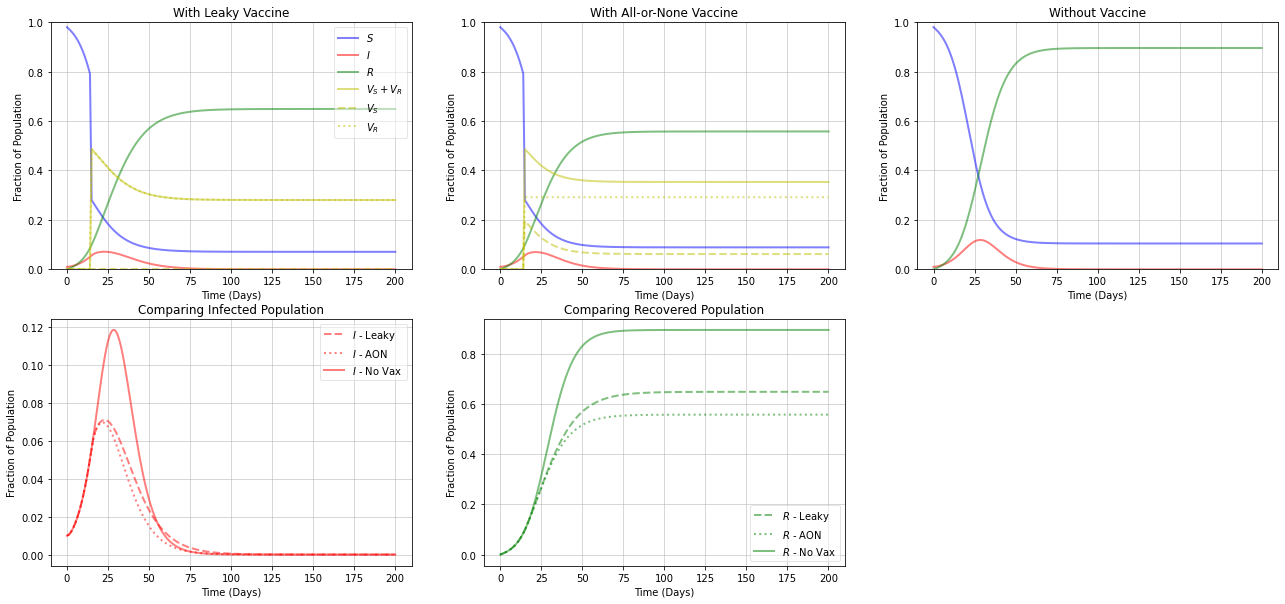

In [56]:
### run model
# set parameters
fv = fc* 0.8

# leaky
sim_leaky_25_below = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_25_below = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_25_below, sim_aon_25_below, savefig=False, filename='timeseries_post10_below')

### Coverage Slightly Above $f^*_V$

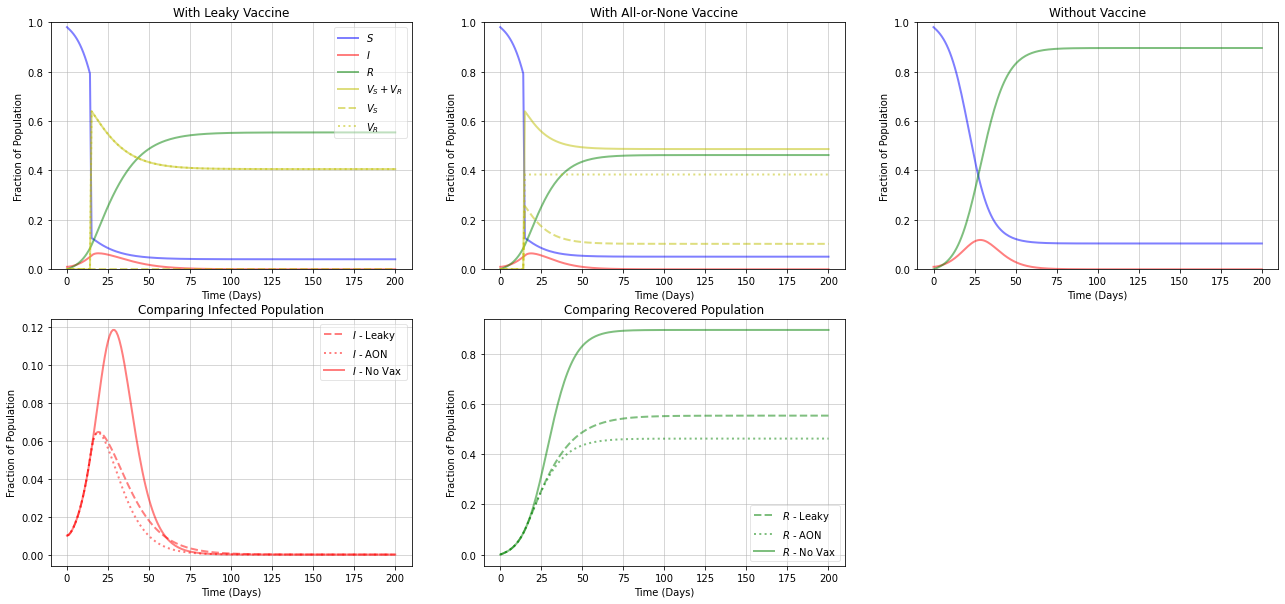

In [57]:
### run model
# set parameters
fv = 1 - ((1 - fc) * 0.8)

# leaky
sim_leaky_25_slabove = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_25_slabove = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_25_slabove, sim_aon_25_slabove, savefig=False, filename='timeseries_post10_below')

### Coverage Above $f^*_V$

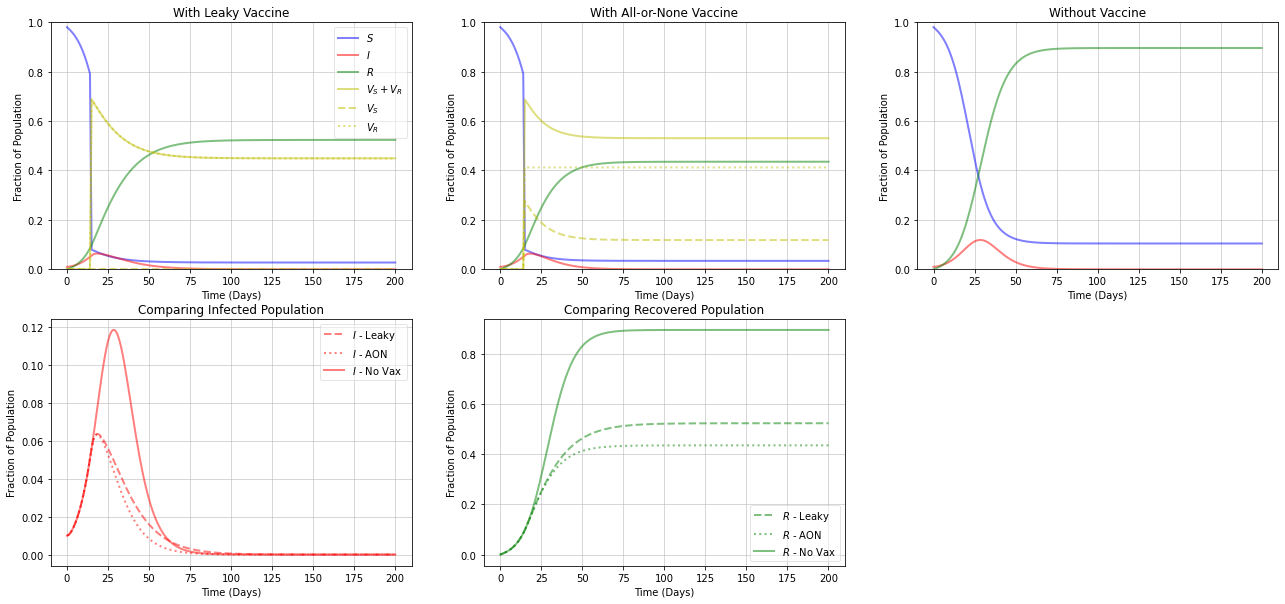

In [58]:
### run model
# set parameters
fv = 1 - ((1 - fc) * 0.5)

# leaky
sim_leaky_25_above = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_25_above = run_modified_seir(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sim, sim_leaky_25_above, sim_aon_25_above, savefig=False, filename='timeseries_post10_below')

## Summary

To compare the differences more effectively, below is a figure that follows the dynamics of just the recovered population over time for each regime.

In [62]:
_, _, _, _, _, _, r_leaky_0_below = sim_leaky_0_below
_, _, _, _, _, _, r_leaky_0_slabove = sim_leaky_0_slabove
_, _, _, _, _, _, r_leaky_0_above = sim_leaky_0_above

_, _, _, _, _, _, r_leaky_10_below = sim_leaky_10_below
_, _, _, _, _, _, r_leaky_10_slabove = sim_leaky_10_slabove
_, _, _, _, _, _, r_leaky_10_above = sim_leaky_10_above

_, _, _, _, _, _, r_leaky_25_below = sim_leaky_25_below
_, _, _, _, _, _, r_leaky_25_slabove = sim_leaky_25_slabove
_, _, _, _, _, _, r_leaky_25_above = sim_leaky_25_above

_, _, _, _, _, _, r_aon_0_below = sim_aon_0_below
_, _, _, _, _, _, r_aon_0_slabove = sim_aon_0_slabove
_, _, _, _, _, _, r_aon_0_above = sim_aon_0_above

_, _, _, _, _, _, r_aon_10_below = sim_aon_10_below
_, _, _, _, _, _, r_aon_10_slabove = sim_aon_10_slabove
_, _, _, _, _, _, r_aon_10_above = sim_aon_10_above

_, _, _, _, _, _, r_aon_25_below = sim_aon_25_below
_, _, _, _, _, _, r_aon_25_slabove = sim_aon_25_slabove
_, _, _, _, _, _, r_aon_25_above = sim_aon_25_above

_, _, _, r = sim

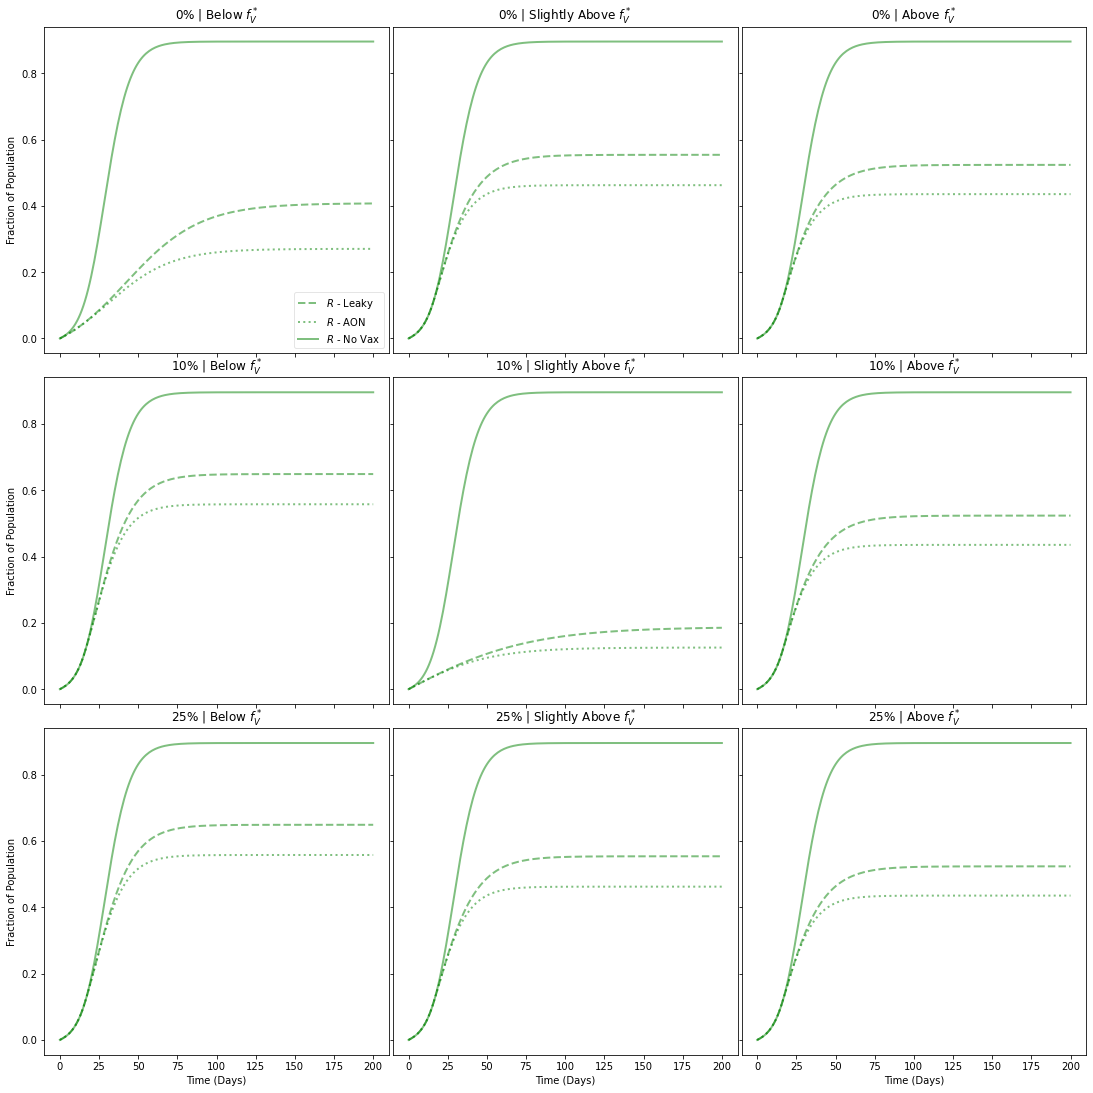

In [65]:
fig, axes = plt.subplots(3,3, facecolor='w', figsize=(15,15), sharex=True, sharey=True, gridspec_kw=dict(width_ratios=[1,1,1]))
t = np.linspace(0, 200, 201)
#norm = plt.Normalize(np.min(np.log(pre_plot_diff_below+1)), np.max(np.log(pre_plot_diff_below+1)))

# Pre-transmission 
axes[0,0].plot(t, r_leaky_0_below, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[0,0].plot(t, r_aon_0_below, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[0,0].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[0,0].set_title('0% | Below $f^*_V$')
axes[0,0].set_ylabel('Fraction of Population')
legend = axes[0,0].legend(); legend.get_frame().set_alpha(0.5)

axes[0,1].plot(t, r_leaky_0_slabove, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[0,1].plot(t, r_aon_0_slabove, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[0,1].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[0,1].set_title('0% | Slightly Above $f^*_V$')

#ax3 = fig.add_subplot(133)
axes[0,2].plot(t, r_leaky_0_above, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[0,2].plot(t, r_aon_0_above, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[0,2].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[0,2].set_title('0% | Above $f^*_V$')

# 10 days post-transmission
axes[1,0].plot(t, r_leaky_10_below, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[1,0].plot(t, r_aon_10_below, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[1,0].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[1,0].set_title('10% | Below $f^*_V$')
axes[1,0].set_ylabel('Fraction of Population')

axes[1,1].plot(t, r_leaky_10_slabove, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[1,1].plot(t, r_aon_10_slabove, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[1,1].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[1,1].set_title('10% | Slightly Above $f^*_V$')

axes[1,2].plot(t, r_leaky_10_above, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[1,2].plot(t, r_aon_10_above, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[1,2].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[1,2].set_title('10% | Above $f^*_V$')

# 30 days post-transmission
axes[2,0].plot(t, r_leaky_25_below, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[2,0].plot(t, r_aon_25_below, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[2,0].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[2,0].set_title('25% | Below $f^*_V$')
axes[2,0].set_ylabel('Fraction of Population')
axes[2,0].set_xlabel('Time (Days)')

axes[2,1].plot(t, r_leaky_25_slabove, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[2,1].plot(t, r_aon_25_slabove, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[2,1].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[2,1].set_title('25% | Slightly Above $f^*_V$')
axes[2,1].set_xlabel('Time (Days)')

axes[2,2].plot(t, r_leaky_25_above, 'g--', alpha=0.5, lw=2, label = "$R$ - Leaky")
axes[2,2].plot(t, r_aon_25_above, 'g:', alpha=0.5, lw=2, label = "$R$ - AON")
axes[2,2].plot(t, r, 'g', alpha=0.5, lw=2, label="$R$ - No Vax")
axes[2,2].set_title('25% | Above $f^*_V$')
axes[2,2].set_xlabel('Time (Days)')

fig.tight_layout(pad=0.05)
#cb = fig.colorbar(mappable=proj, ax=axes, fraction=0.02, shrink=0.5)
#cb.ax.set_yticklabels(np.round(np.exp(np.linspace(0.0, 4.2, 8))))
plt.savefig('timeseries_size_recovered_comparison', bbox_inches='tight')
plt.show()